In [16]:
import pandas as pd 
df = pd.read_csv(r'/Users/admin/Desktop/python/di-bootcamp/week7/day3/adult/adult.data')
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'
]
df.columns = column_names

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [20]:
df['income'].value_counts()

income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#Min-Max scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Z-score normalization
z_score_scaler = StandardScaler()
df_z_score_scaled = df.copy()
df_z_score_scaled[numerical_columns] = z_score_scaler.fit_transform(df[numerical_columns])


To analyse the changes in data distribution post-normalization, let's check the diferences in data distribution by comparing the statistical measures (mean, standard deviation, min, max) of the numerical columns before and after normalization.

In [28]:
# Calculate statistics before normalization
stats_before = df[numerical_columns].describe()

# Calculate statistics after Min-Max scaling
stats_after_min_max = df_min_max_scaled[numerical_columns].describe()

# Calculate statistics after Z-score normalization
stats_after_z_score = df_z_score_scaled[numerical_columns].describe()


In [25]:
print("Statistics Before Normalization:")
print(stats_before)

Statistics Before Normalization:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [26]:
print("\nStatistics After Min-Max Scaling:")
print(stats_after_min_max)


Statistics After Min-Max Scaling:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  32560.000000   32560.000000  32560.000000  32560.000000   
mean       0.295639      0.120548       0.605373      0.010776      0.020043   
std        0.186858      0.071685       0.171514      0.073855      0.092508   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.071682       0.533333      0.000000      0.000000   
50%        0.273973      0.112793       0.600000      0.000000      0.000000   
75%        0.424658      0.152653       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours-per-week  
count    32560.000000  
mean         0.402423  
std          0.125996  
min          0.000000  
25%          0.397959  
50%          0.397959  
75%          0.448980  
max          1.000000  


We can see such changes after Min-Max Scaling:
Mean and Standard Deviation: Transforms data to a range between 0 and 1.
Min and Max Values: Sets minimum value to 0 and maximum value to 1 for each feature.
Z-score Normalization (Standardization):
Mean and Standard Deviation: Centers data around a mean of 0 and standard deviation of 1.
Min and Max Values: Data is spread out based on standard deviation from the mean.

In [27]:
print("\nStatistics After Z-score Normalization:")
print(stats_after_z_score)


Statistics After Z-score Normalization:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3.256000e+04  3.256000e+04   3.256000e+04  3.256000e+04  3.256000e+04   
mean   1.968395e-16 -7.757922e-17   5.281061e-17 -1.964031e-17  4.517271e-17   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582181e+00 -1.681667e+00  -3.529637e+00 -1.459137e-01 -2.166630e-01   
25%   -7.757550e-01 -6.816824e-01  -4.200266e-01 -1.459137e-01 -2.166630e-01   
50%   -1.159519e-01 -1.081858e-01  -3.132531e-02 -1.459137e-01 -2.166630e-01   
75%    6.904742e-01  4.478779e-01   7.460773e-01 -1.459137e-01 -2.166630e-01   
max    3.769555e+00  1.226855e+01   2.300883e+00  1.339438e+01  1.059334e+01   

       hours-per-week  
count    3.256000e+04  
mean     2.869667e-16  
std      1.000015e+00  
min     -3.193982e+00  
25%     -3.542999e-02  
50%     -3.542999e-02  
75%      3.695126e-01  
max      4.742893e+00  


We can see such changes after Z-score normalization: 
Mean and Standard Deviation: Centers data around a mean of 0 and standard deviation of 1.
Min and Max Values: Data is spread out based on standard deviation from the mean.

In [30]:
from scipy import stats
import numpy as np

#Z-scores for numerical columns
z_scores = stats.zscore(df[numerical_columns])

# Identifying outliers using Z-scores greater than 3 or less than -3
outliers_indices = np.where((z_scores > 3) | (z_scores < -3))
outliers = df.iloc[outliers_indices[0]]

In [31]:
print(outliers)

       age   workclass  fnlwgt      education  education-num  \
9       37     Private  280464   Some-college             10   
22      43     Private  117037           11th              7   
27      39     Private  367260        HS-grad              9   
31      45     Private  386940      Bachelors             13   
36      19     Private  544091        HS-grad              9   
...    ...         ...     ...            ...            ...   
32510   25   Local-gov  514716      Bachelors             13   
32517   57   Local-gov  110417        HS-grad              9   
32524   81           ?  120478      Assoc-voc             11   
32524   81           ?  120478      Assoc-voc             11   
32530   30           ?   33811      Bachelors             13   

            marital-status         occupation    relationship  \
9       Married-civ-spouse    Exec-managerial         Husband   
22      Married-civ-spouse   Transport-moving         Husband   
27                Divorced    Exec-m

In [32]:
# Replace '?' in categorical columns with the most frequent value
categorical_columns = ['workclass', 'occupation']
for col in categorical_columns:
    df[col] = df[col].replace('?', df[col].mode()[0])

In [34]:
df['workclass'].value_counts #check

<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: workclass, Length: 32560, dtype: object>

In [36]:
df['occupation'].value_counts #check

<bound method IndexOpsMixin.value_counts of 0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: occupation, Length: 32560, dtype: object>

Let's implement a trimming approach to columns:  'capital-gain' or 'capital-loss'

In [37]:
# Calculate IQR for 'capital-gain' and 'capital-loss'
Q1_gain = df['capital-gain'].quantile(0.25)
Q3_gain = df['capital-gain'].quantile(0.75)
IQR_gain = Q3_gain - Q1_gain

Q1_loss = df['capital-loss'].quantile(0.25)
Q3_loss = df['capital-loss'].quantile(0.75)
IQR_loss = Q3_loss - Q1_loss

# Define upper and lower bounds for capping (I decided to take 3 times IQR)
upper_bound_gain = Q3_gain + 3 * IQR_gain
lower_bound_gain = Q1_gain - 3 * IQR_gain

upper_bound_loss = Q3_loss + 3 * IQR_loss
lower_bound_loss = Q1_loss - 3 * IQR_loss

# Cap extreme values
df['capital-gain'] = df['capital-gain'].clip(lower=lower_bound_gain, upper=upper_bound_gain)
df['capital-loss'] = df['capital-loss'].clip(lower=lower_bound_loss, upper=upper_bound_loss)


I'll use Capping (Winsorizing) to 'hours-per-week'

In [39]:
from scipy.stats.mstats import winsorize

# Winsorize data
winsorized_hours = winsorize(df['hours-per-week'], limits=[0.05, 0.05])

# Convert to DataFrame for further analysis if needed
winsorized_hours_df = pd.DataFrame(winsorized_hours, columns=['hours-per-week'])


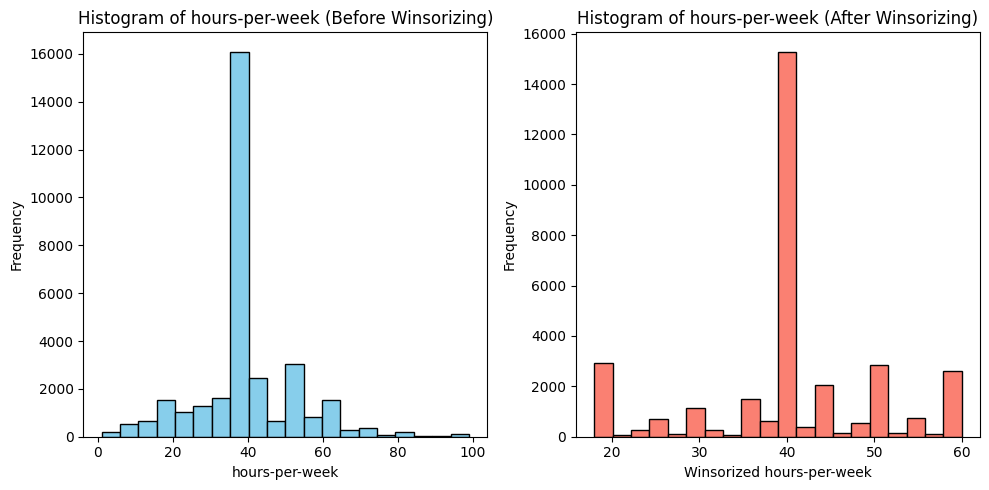

In [45]:
import matplotlib.pyplot as plt

# Plotting histograms before and after Winsorizing
plt.figure(figsize=(10, 5))

# Histogram before Winsorizing
plt.subplot(1, 2, 1)
plt.hist(df['hours-per-week'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of hours-per-week (Before Winsorizing)')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')

# Histogram after Winsorizing
plt.subplot(1, 2, 2)
plt.hist(winsorized_hours, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of hours-per-week (After Winsorizing)')
plt.xlabel('Winsorized hours-per-week')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


I'll use transfotmation (box-cox) to 'education-num'

In [41]:
from scipy import stats

# Box-Cox transformation for 'education-num' column
small_const = 1
df['education-num_boxcox'], _ = stats.boxcox(df['education-num'] + small_const)


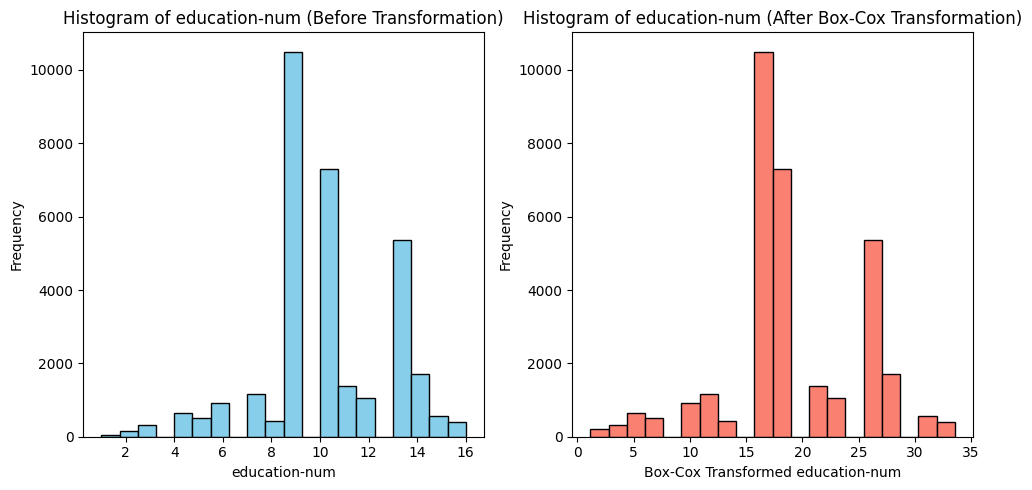

In [44]:
import matplotlib.pyplot as plt

# Plotting histograms before and after Box-Cox transformation
plt.figure(figsize=(10, 5))

# Histogram before transformation
plt.subplot(1, 2, 1)
plt.hist(df['education-num'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of education-num (Before Transformation)')
plt.xlabel('education-num')
plt.ylabel('Frequency')

# Histogram after Box-Cox transformation
plt.subplot(1, 2, 2)
plt.hist(df['education-num_boxcox'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of education-num (After Box-Cox Transformation)')
plt.xlabel('Box-Cox Transformed education-num')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Now let's visualized in box plots all these columns.

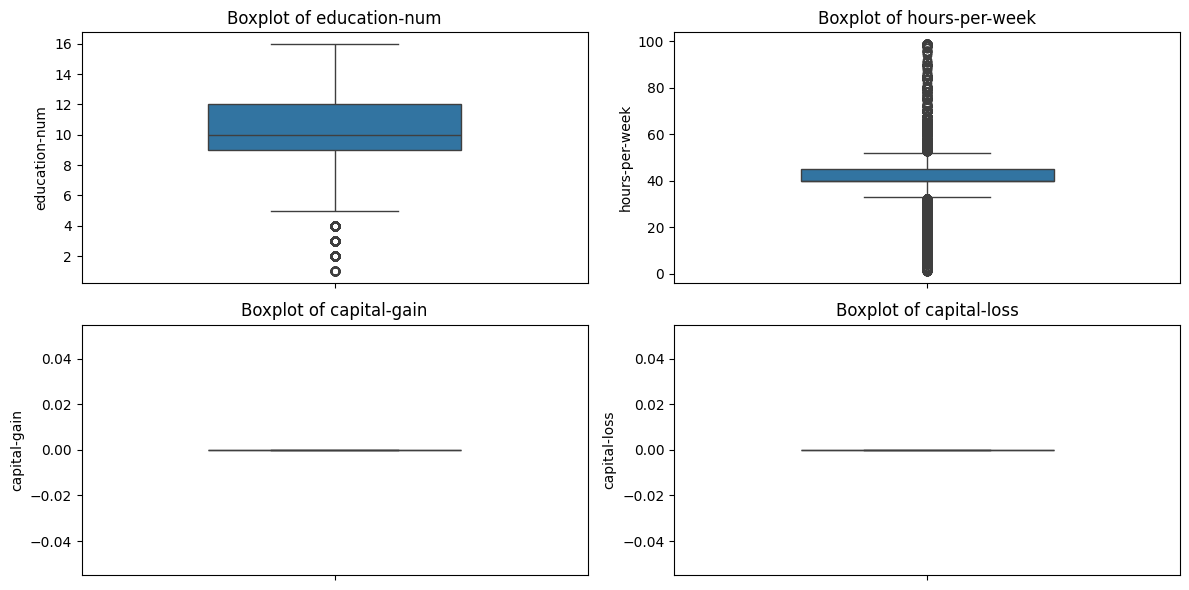

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[column], orient='v', width=0.5)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Impact Summary:

Data Distribution: Changed by all methods, affecting spread, center, and shape.
Information Loss: Trimming/capping may discard valuable rare data, impacting insights.
Statistical Measures: Outliers influence means, deviations; handling affects measures.
Analysis Robustness: Methods can improve robustness by minimizing outlier impact.
Assumptions: Methods might align data better with analysis assumptions.
Each method alters the dataset uniquely, affecting subsequent analyses via distribution changes, information loss, statistical measures, and assumptions. Consider trade-offs for meaningful interpretation.